In [1]:
#RUN THIS BEFORE USING
%reset
%matplotlib inline
import network_modules as nm
import numpy as np
import matplotlib.pyplot as plt
import cmath as c

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


C:\Users\Rohit\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


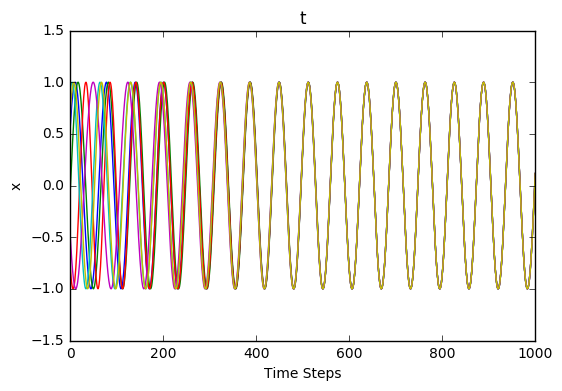

In [2]:
distributions = [(6,0,2*np.pi,'uniform')]
phase = nm.create_vec_states(distributions)
x = np.cos(phase) + np.sin(phase)*1j

G = nm.create_network('SCC') #Basic Graph

def h(x):   #node function
    w = 10
    return 1j * x * w + x*(1-abs(x))

def f(x,y): #coupling function
    K = 1
    return 1j * x * complex(K*np.sin(c.phase(y[0])-c.phase(x[0])),0)

M = np.identity(6) #Measurement Matrix

N = 1 #Noise Variance

#Initialize & Run model for t = 10 sec
po_model = nm.nmodel(G,x,h,f,M,N,dt=.01)
po_model.run(10)
nm.state_course(nm.reduce_state(0,po_model.x))